In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

In [2]:

%cd ..

c:\Users\chris\OneDrive\Escritorio\Maestria\13. MLOps\Git 2\urban-traffic-prediction-repo


c:\Users\chris\OneDrive\Escritorio\Maestria\13. MLOps\Git 2\urban-traffic-prediction-repo\mlopsvenv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from src.data.preprocess import preprocess_data

preprocess_data('params.yaml')

2024-10-17 00:35:30,874 — DATA_PREPROCESS — INFO — Get dataset
2024-10-17 00:35:30,882 — DATA_PREPROCESS — INFO — Preprocess dataset
2024-10-17 00:35:30,887 — DATA_PREPROCESS — INFO — Preprocess Done


In [4]:
from src.data.process import DataFrameProcessor

processor = DataFrameProcessor('params.yaml')
processor.full_process()


2024-10-17 00:35:30,982 — DATA_PROCESS — INFO — Checking for missing values
2024-10-17 00:35:30,982 — DATA_PROCESS — INFO — Transforming days to numerical values
2024-10-17 00:35:31,008 — DATA_PROCESS — INFO — Data exported to data/processed/processed_data.csv



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   hour_coded                             135 non-null    int64  
 1   immobilized_bus                        135 non-null    int64  
 2   broken_truck                           135 non-null    int64  
 3   vehicle_excess                         135 non-null    int64  
 4   accident_victim                        135 non-null    int64  
 5   running_over                           135 non-null    int64  
 6   fire_vehicles                          135 non-null    int64  
 7   occurrence_involving_freight           135 non-null    int64  
 8   incident_involving_dangerous_freight   135 non-null    int64  
 9   lack_of_electricity                    135 non-null    int64  
 10  fire                                   135 non-n

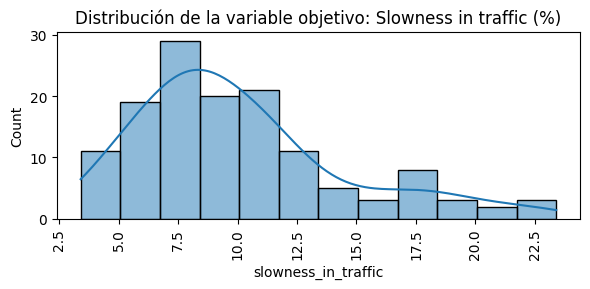

Se observa una distribución asimétrica hacia la derecha, teniendo la moda a 7.5%


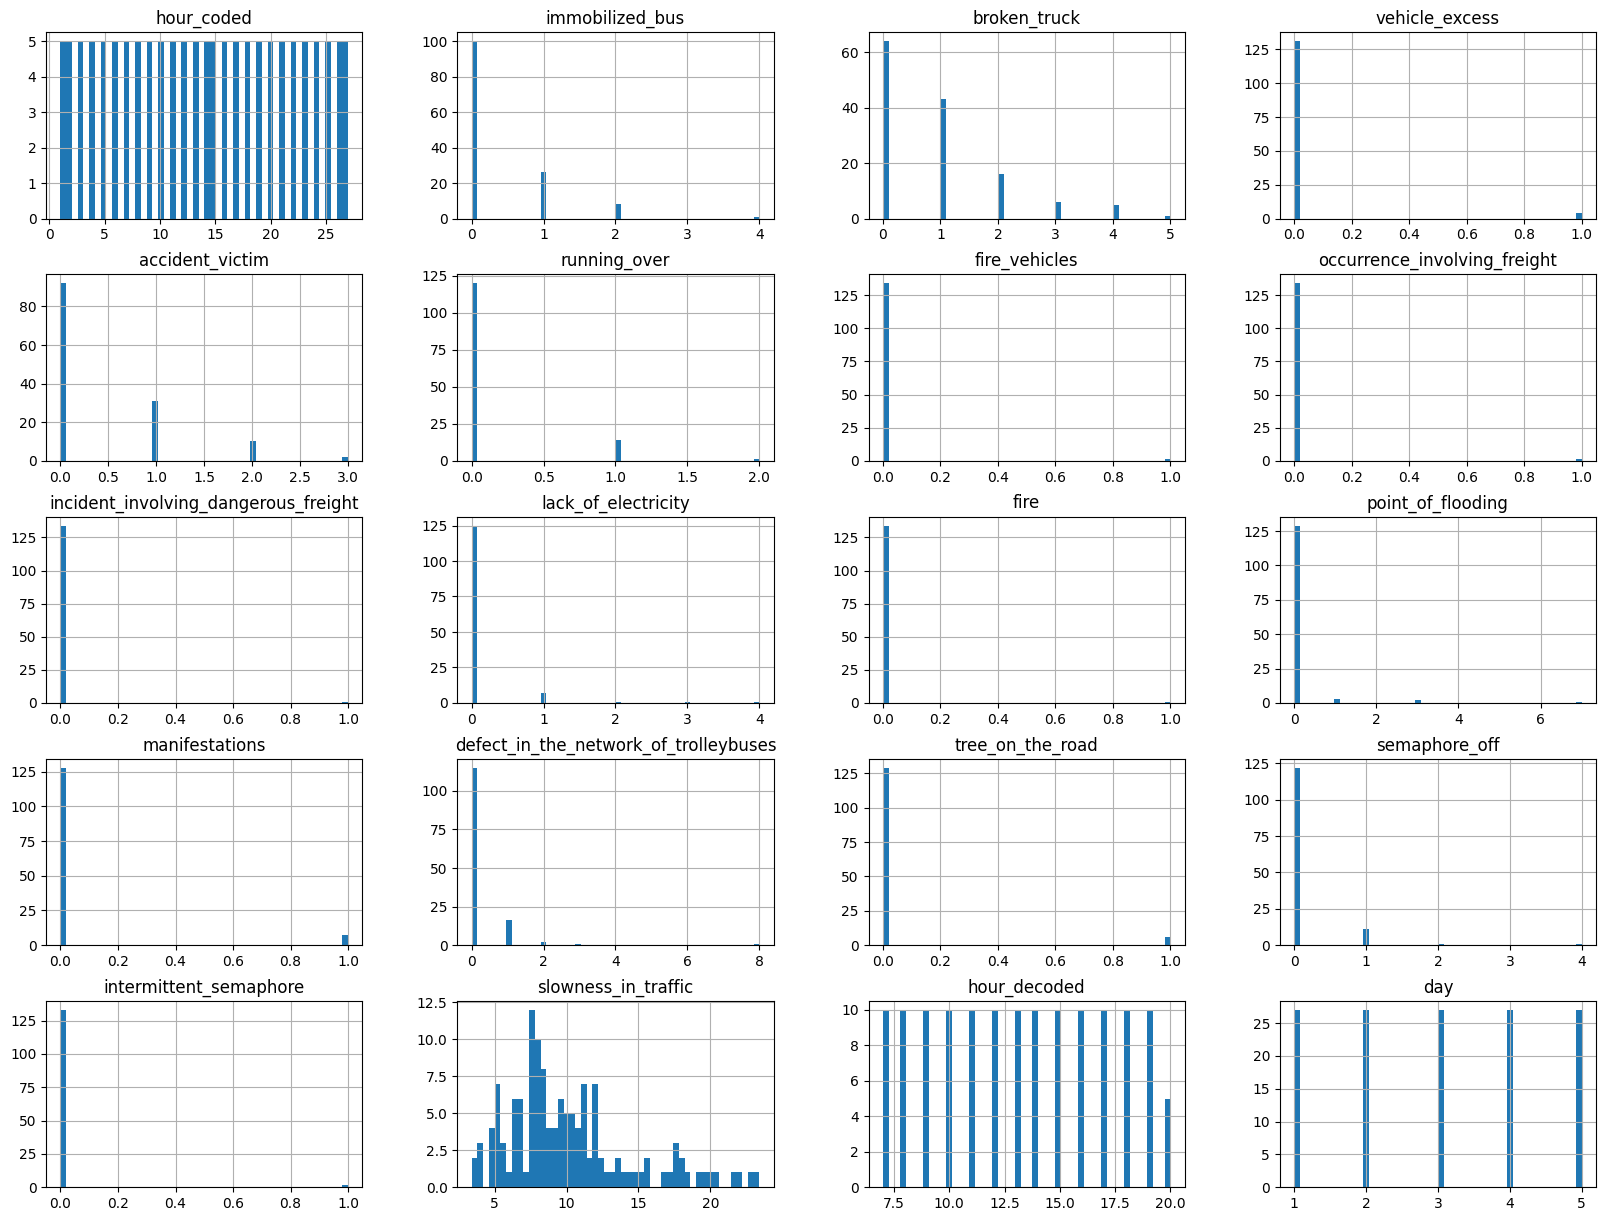

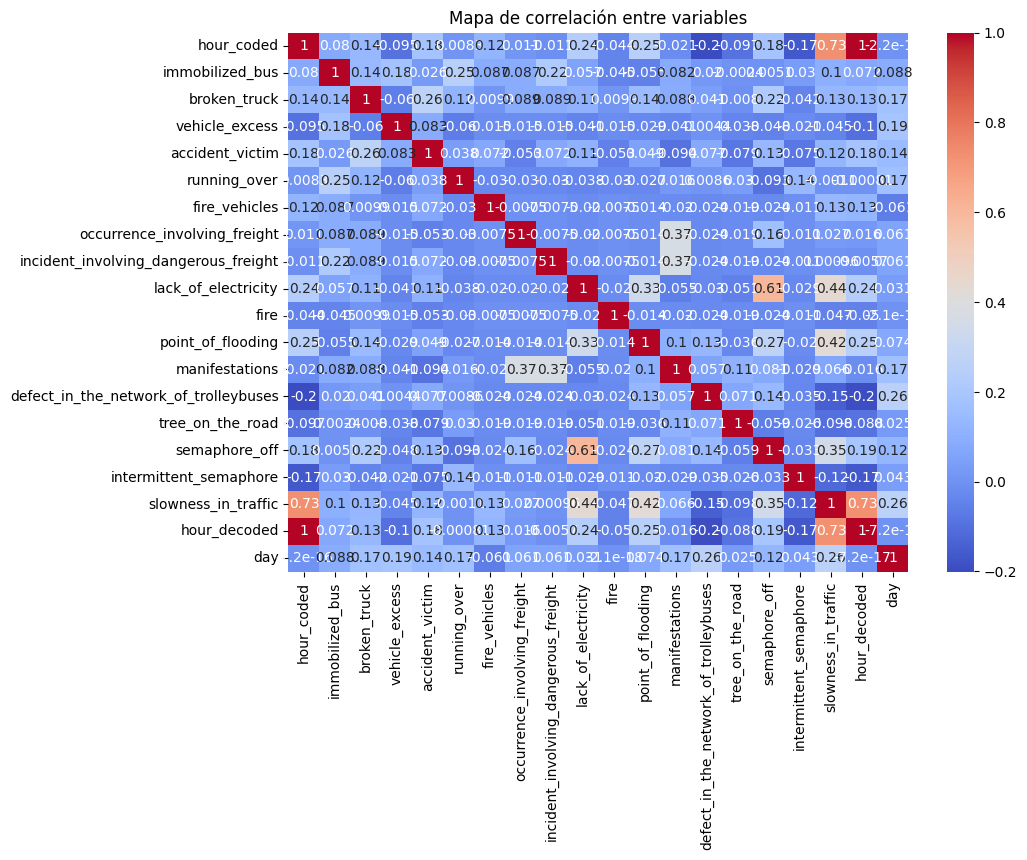

Se visualiza una correlación alta en la variable "Hour" y "Slowness in traffic".
Se visualiza una correlación alta en "Semaphore off" y "lack of electricity".


In [5]:
from src.data.analyze import DataFrameAnalyzer

analyzer = DataFrameAnalyzer('params.yaml')
analyzer.full_analysis()

In [6]:
from src.data.split import data_split

data_split('params.yaml')

2024-10-17 00:35:35,770 — DATA_SPLIT — INFO — Split features into train and test sets
2024-10-17 00:35:35,774 — DATA_SPLIT — INFO — Save train and test sets


In [7]:
from src.model.train import ModelTrainer

evaluator = ModelTrainer('params.yaml')
evaluator.run()

2024-10-17 00:35:36,005 — MODEL_TRAINER — INFO — Initialized ModelTrainer
2024-10-17 00:35:36,006 — MODEL_TRAINER — INFO — Loading datasets...
2024-10-17 00:35:36,007 — MODEL_TRAINER — INFO — Datasets loaded successfully.
2024-10-17 00:35:36,007 — MODEL_TRAINER — INFO — Scaling data...
2024-10-17 00:35:36,011 — MODEL_TRAINER — INFO — Data scaling completed.
2024-10-17 00:35:36,011 — MODEL_TRAINER — INFO — Evaluating model: LR
2024-10-17 00:35:36,095 — MODEL_TRAINER — INFO — Model: LR
2024-10-17 00:35:36,095 — MODEL_TRAINER — INFO — Cross-Validation RMSE: 2.717
2024-10-17 00:35:36,095 — MODEL_TRAINER — INFO — Cross-Validation MAE: 2.159
2024-10-17 00:35:36,095 — MODEL_TRAINER — INFO — Cross-Validation R2: 0.647
2024-10-17 00:35:36,095 — MODEL_TRAINER — INFO — Evaluating model: kNN
2024-10-17 00:35:36,557 — MODEL_TRAINER — INFO — Model: kNN
2024-10-17 00:35:36,557 — MODEL_TRAINER — INFO — Cross-Validation RMSE: 2.753
2024-10-17 00:35:36,561 — MODEL_TRAINER — INFO — Cross-Validation MAE: 

c:\Users\chris\OneDrive\Escritorio\Maestria\13. MLOps\Git 2\urban-traffic-prediction-repo\mlopsvenv\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\chris\OneDrive\Escritorio\Maestria\13. MLOps\Git 2\urban-traffic-prediction-repo\mlopsvenv\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\chris\OneDrive\Escritorio\Maestria\13. MLOps\Git 2\urban-traffic-prediction-repo\mlopsvenv\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\chris\OneDrive\Escritorio\Maestria\13. MLOps\Git 2\urban-traffic-prediction-repo\mlopsvenv\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _sco

2024-10-17 00:36:12,991 — MODEL_TRAINER — INFO — Model: XGBoost
2024-10-17 00:36:12,991 — MODEL_TRAINER — INFO — Cross-Validation RMSE: 1.625
2024-10-17 00:36:12,992 — MODEL_TRAINER — INFO — Cross-Validation MAE: 1.170
2024-10-17 00:36:12,992 — MODEL_TRAINER — INFO — Cross-Validation R2: 0.874
2024-10-17 00:36:12,993 — MODEL_TRAINER — INFO — Evaluating model: SVR
2024-10-17 00:36:13,454 — MODEL_TRAINER — INFO — Model: SVR
2024-10-17 00:36:13,455 — MODEL_TRAINER — INFO — Cross-Validation RMSE: 3.318
2024-10-17 00:36:13,456 — MODEL_TRAINER — INFO — Cross-Validation MAE: 2.380
2024-10-17 00:36:13,456 — MODEL_TRAINER — INFO — Cross-Validation R2: 0.473
2024-10-17 00:36:13,457 — MODEL_TRAINER — INFO — Best Model: XGBoost with Cross-Validation RMSE: 1.625
2024-10-17 00:36:13,461 — MODEL_TRAINER — INFO — Model training completed.
2024-10-17 00:36:13,461 — MODEL_TRAINER — INFO — Best model saved successfully.


In [8]:
from src.evaluate.evaluate_model import ModelEvaluator

evaluator = ModelEvaluator('params.yaml')
evaluator.run()

2024-10-17 00:36:13,598 — MODEL_EVALUATOR — INFO — Initialized ModelEvaluator
2024-10-17 00:36:13,599 — MODEL_EVALUATOR — INFO — Loading test dataset...
2024-10-17 00:36:13,601 — MODEL_EVALUATOR — INFO — Test data loaded successfully.
2024-10-17 00:36:13,602 — MODEL_EVALUATOR — INFO — Loading best model...
2024-10-17 00:36:13,613 — MODEL_EVALUATOR — INFO — Evaluating model on test data...
2024-10-17 00:36:13,618 — MODEL_EVALUATOR — INFO — Test RMSE: 1.518
2024-10-17 00:36:13,619 — MODEL_EVALUATOR — INFO — Test MAE: 1.281
2024-10-17 00:36:13,620 — MODEL_EVALUATOR — INFO — Test R2: 0.788
2024-10-17 00:36:13,621 — MODEL_EVALUATOR — INFO — Métricas guardadas en reports/metrics/metrics.json
2024-10-17 00:36:13,761 — MODEL_EVALUATOR — INFO — Gráfico de calidad de predicción guardado en reports/figures/prediction_vs_true.png
